# Targeted Marketing Campaign: Bank Dataset
***

<img src = '../images/targeted_client.jpg'/>

## What is Marketing Campaign?
***
Marketing campaigns promote a service or product through different media, for customer acquisition. Marketing is all about reaching customers, and the target is to sell the product/service to the customers.

### Targeted Marketing
***
Marketing has cost. Targeting right customers for the campaign would hugely benefit the campaign. In contrast, targeting wrong customers may not only be wrong investment, but also damage the brand value of the company.

<img src = '../images/term_deposit.png'/>

## Term Deposit
***
A term deposit is a cash investment held at a financial institution. The money is invested for an agreed rate of interest over a fixed amount of time, or term. It is there for the pre-determined period which usually ranges from 1 month to 5 years and the interest rate is guaranteed not to change for that nominated period of time.  The money can only be withdrawn at the end of the period – or earlier with a penalty attached.

As part of the marketing campaign, it would highly benefit if we could target rightful candidates who are likely to subscribe to term deposit than to campaign against just anybody.

## Bank Dataset
***
The data used is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The source of the data is <a href = 'https://archive.ics.uci.edu/ml/datasets/bank+marketing'>UCI Machine Learning Repository</a>.

The bank dataset has three kinds of attributes:
- bank client data:
    - age (numeric)
    - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    - default: has credit in default? (categorical: 'no','yes','unknown')
    - housing: has housing loan? (categorical: 'no','yes','unknown')
    - loan: has personal loan? (categorical: 'no','yes','unknown')
- related with the last contact of the current campaign:
    - contact: contact communication type (categorical: 'cellular','telephone') 
    - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- other attributes:
    - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    - previous: number of contacts performed before this campaign and for this client (numeric)
    - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

## Acknowledgement
***
The notebook has heavily sought help from the <a href = "https://www.kaggle.com/janiobachmann/marketing-campaign-opening-a-term-deposit/data">linked</a> kernel.

## Goal of the notebook
***
There are multiple goals of the notebook. Following are those:
1. Build a predictive model to identify the rightful clients who are likely to subscribe to the term deposit.
2. Understand what attributes are  responsible for clients to subscribe to term deposit.
3. Prescribe ways to make marketing campaigns more effective than it already is.
3. Perform extended data analysis to see if there are any other interesting information/pattern that could be exploited out of the data.

## About the notebook
***
This notebook essentially has six parts and is well structured, in a way, its easy to follow. Following are the parts:
- Data Quality Check
- Descriptive Statistics
    - Target Variable: Deposit
    - Numerical Attributes
    - Categorical Attributes
- Preprocessing
- Predictive Statistics
- Feature Importances
- Prescriptive Statistics
***

# Import Packages
***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Read the data
***

In [2]:
df = pd.read_csv('../data/bank.csv')
data = df.copy()

# Data Quality Check
***

In [3]:
# Examine head dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
# Check the type of our features. Are there any data inconsistencies?
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [5]:
# Can you check to see if there are any missing values in our data set
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
deposit      False
dtype: bool

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [7]:
# Rename columns
df = df.rename(columns={'housing': 'housing_loan', 
                        'campaign': 'times_contacted',
                        'pdays': 'days_passed',
                        'previous': 'previously_contacted',
                        'poutcome': 'previous_campaign_output'
                        })

In [8]:
# shape
df.shape

(11162, 17)

# Exploratory Data Analysis
***

In [9]:
# Display the statistical overview of the attributes
df.describe()

,age,balance,day,duration,times_contacted,days_passed,previously_contacted
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


**Observations:**
1. There are several customers with balance in negative.
2. There are several customers from whom "days_passed" (aka days passed since last contacted) is set to -1. Its not clear on what -1 denotes.
3. Most of the customers were NOT contacted for previous campaigns.

In [10]:
df.describe(include = ['object'])

,job,marital,education,default,housing_loan,loan,contact,month,previous_campaign_output,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


**Observations:**
1. Cause most customers were not part of previous campaign, so most of the customers of "previous_campaign_output" is set to "unknown".
2. Most customers aren't a defaulter of loan.

## Target Variable: deposit
***

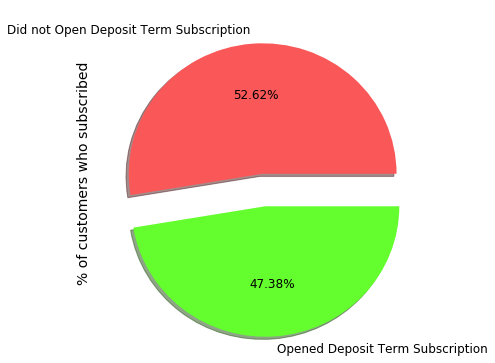

In [11]:
colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Deposit Term Subscription", "Opened Deposit Term Subscription"
fig, ax = plt.subplots(figsize=(6, 6))

df["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', 
                                         ax=ax, shadow=True, 
                                         colors=colors, labels=labels, fontsize=12)
ax.set_ylabel('% of customers who subscribed', fontsize=14)
plt.show()

In [12]:
deposit_summary = df.groupby('deposit')
deposit_summary.mean()

,age,balance,day,duration,times_contacted,days_passed,previously_contacted
deposit,,,,,,,
no,40.837391,1280.227141,16.108122,223.130257,2.839264,35.685340,0.528350
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


**Observations:**
1. The call duration of the previous call was significantly higher for the ones who subscribed to term deposit. This is pretty normal. The customers interested would be talking longer. It would be wise to get rid of this feature.

## Numerical Atributes
***

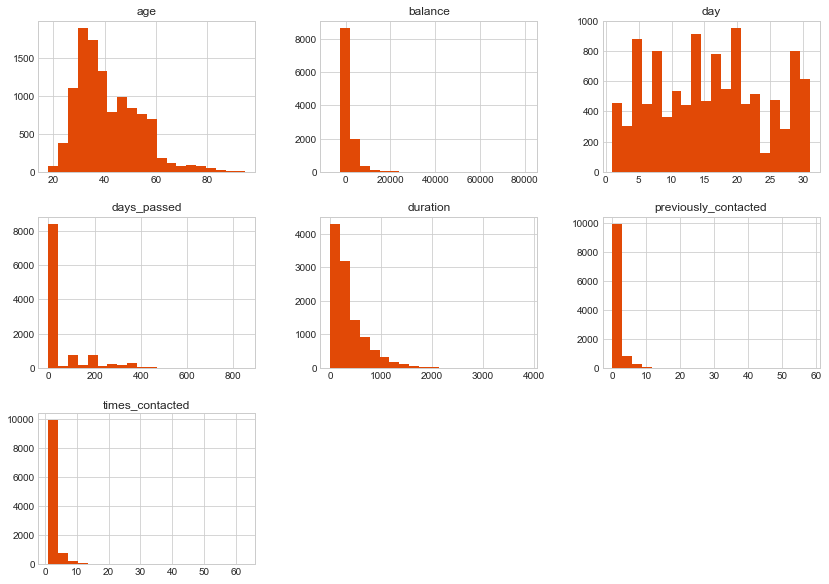

In [13]:
# Let's see how the numeric data is distributed.
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

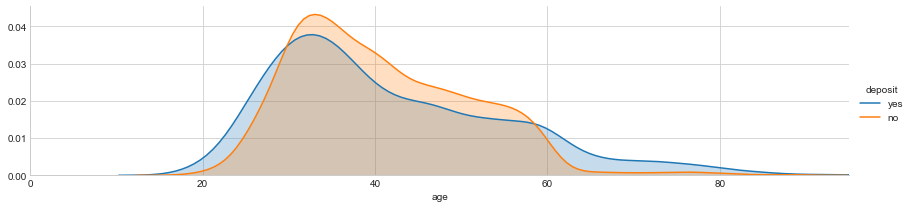

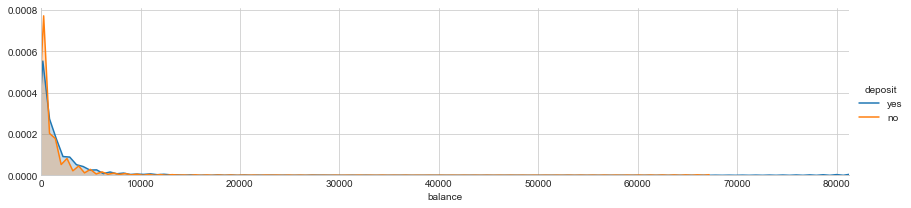

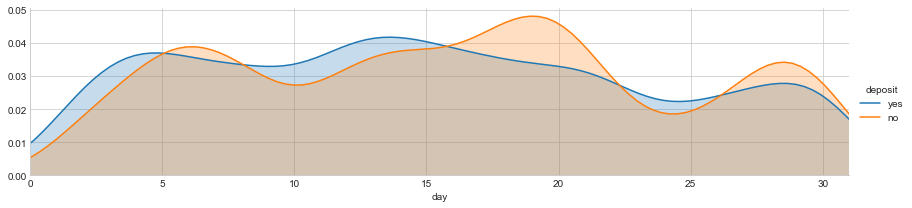

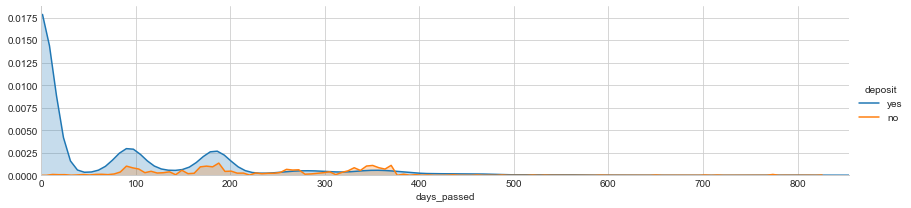

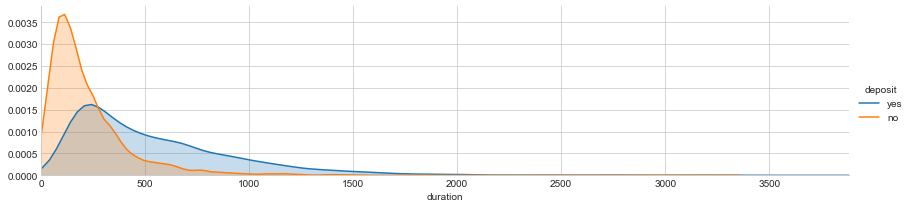

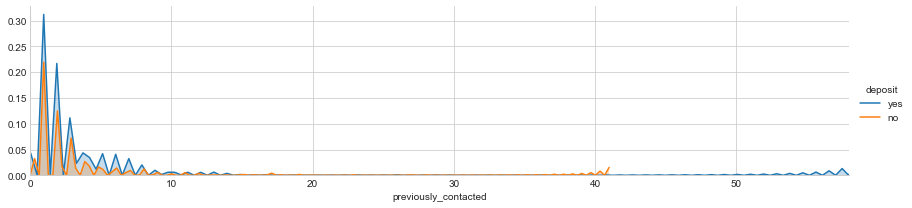

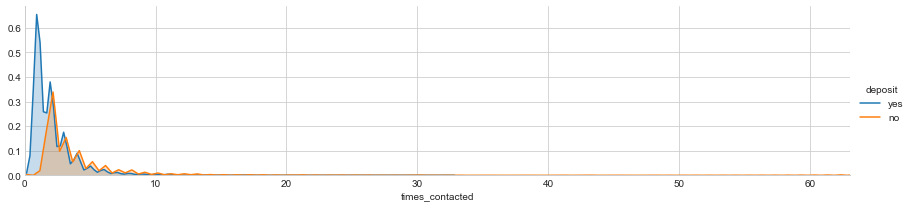

In [14]:
quantitative = ['age', 'balance', 'day', 'days_passed', 'duration',
               'previously_contacted', 'times_contacted']
for col in quantitative:   
    a = sns.FacetGrid( df, hue = 'deposit', aspect=4 )
    a.map(sns.kdeplot, col, shade= True )
    a.set(xlim=(0 , df[col].max()))
    a.add_legend()

**Observations:**
1. Approximately, the ones who subscribed for term deposit seems to have higher balance than the ones who don't have term deposit.
2. The ones who subscribed for term deposits seems to have been contacted for previous campaigns too.

### Times Contacted
***

In [15]:
df[['deposit', 'times_contacted']].groupby('deposit', as_index=False).mean()

,deposit,times_contacted
0,no,2.839264
1,yes,2.141047


**Observations:**
- On an average, clients who subscribed to term deposits required less number of call.
- There is only 35.28% chance that clients being called more than 3 times, and the client subscribed to term deposit.

## Categorical Attributes
***

In [16]:
df['deposit'] = df['deposit'].map({'no' : 0, 'yes' : 1}) 

#Discrete Variable Correlation by "deposit" using group by
qualitative = ['job', 'marital', 'education', 'default', 
               'housing_loan', 'loan', 'contact', 'month', 'previous_campaign_output']
for x in qualitative:
    print(' Correlation by:', x)
    print(df[[x, 'deposit']].groupby(x, as_index=False).mean())
    print('-'*10, '\n')

 Correlation by: job
              job   deposit
0          admin.  0.473013
1     blue-collar  0.364198
2    entrepreneur  0.375000
3       housemaid  0.397810
4      management  0.507015
5         retired  0.663239
6   self-employed  0.461728
7        services  0.399783
8         student  0.747222
9      technician  0.460779
10     unemployed  0.565826
11        unknown  0.485714
---------- 

 Correlation by: marital
    marital   deposit
0  divorced  0.481052
1   married  0.433790
2    single  0.543491
---------- 

 Correlation by: education
   education   deposit
0    primary  0.394000
1  secondary  0.447407
2   tertiary  0.541068
3    unknown  0.507042
---------- 

 Correlation by: default
  default   deposit
0      no  0.476351
1     yes  0.309524
---------- 

 Correlation by: housing_loan
  housing_loan   deposit
0           no  0.570311
1          yes  0.366408
---------- 

 Correlation by: loan
  loan   deposit
0   no  0.495259
1  yes  0.331507
---------- 

 Correlation by: co

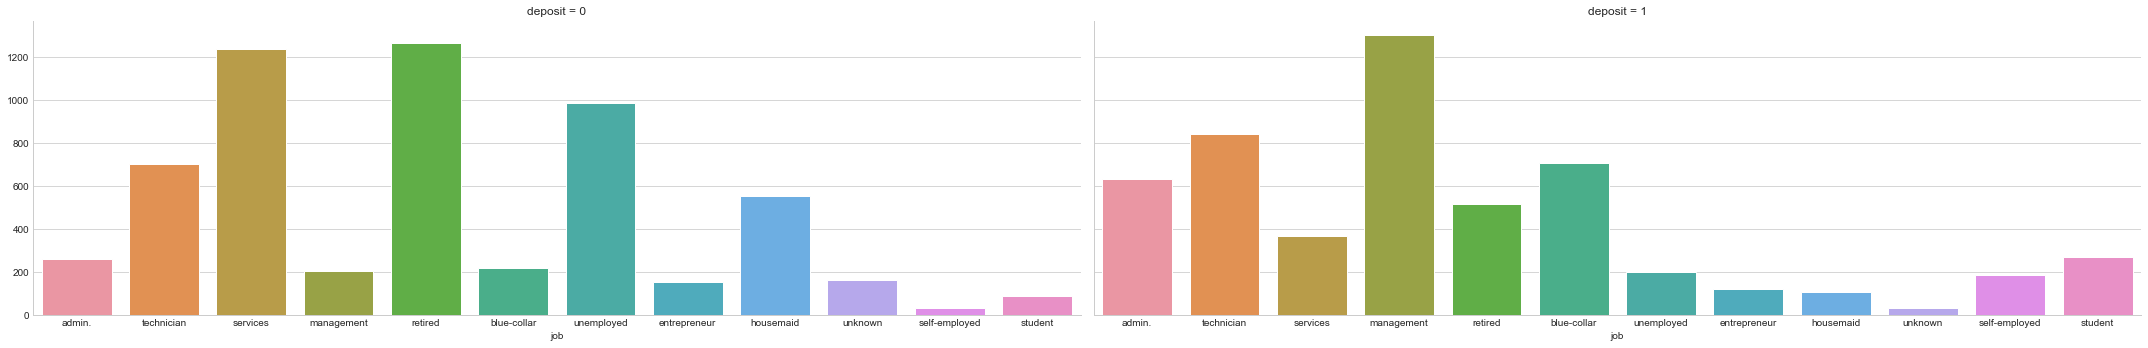

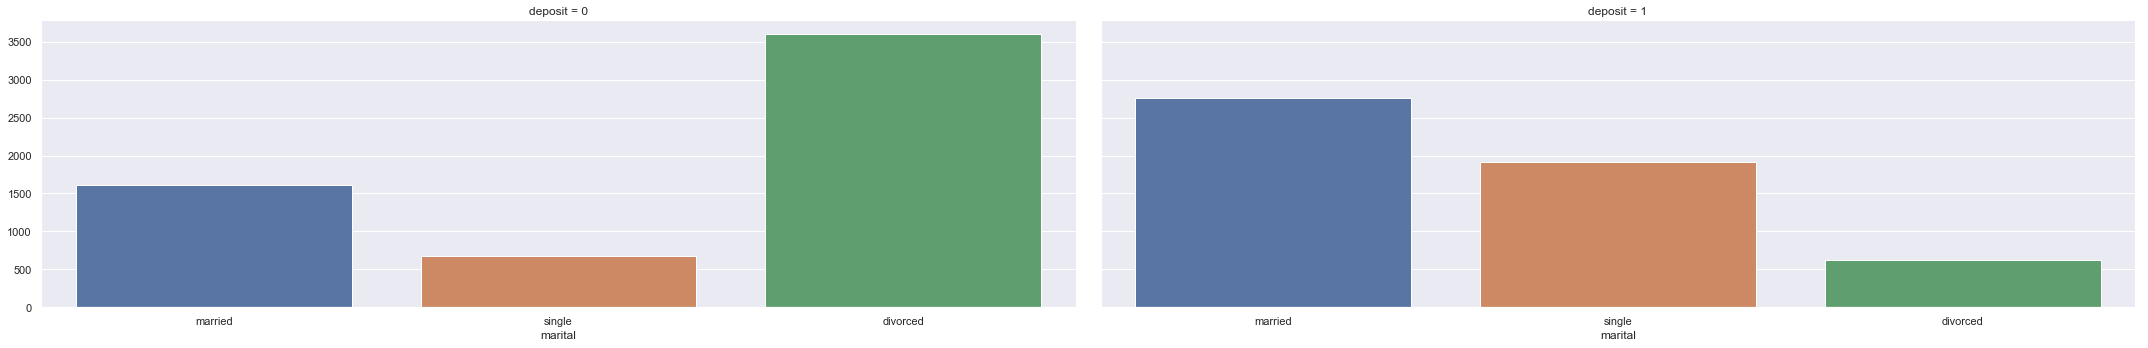

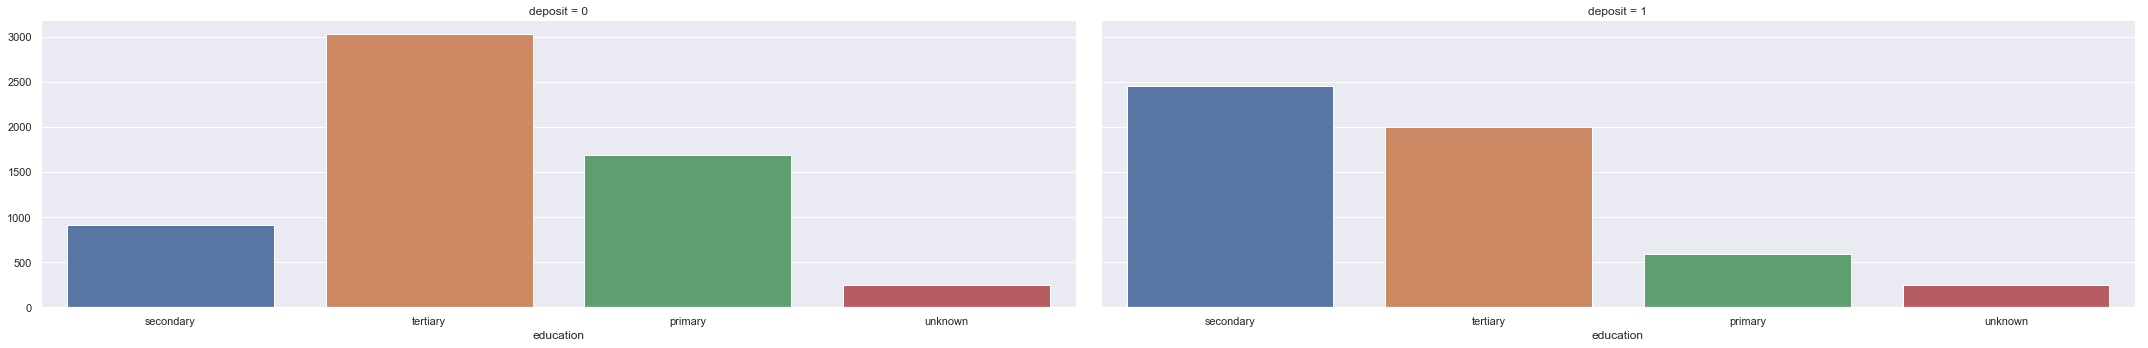

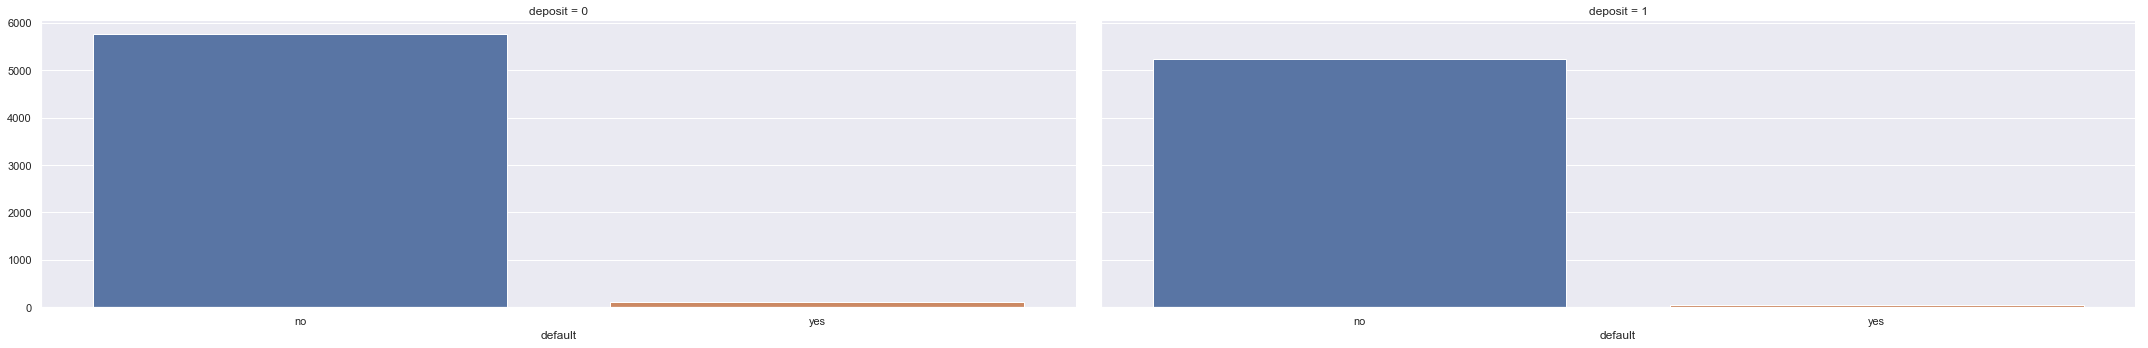

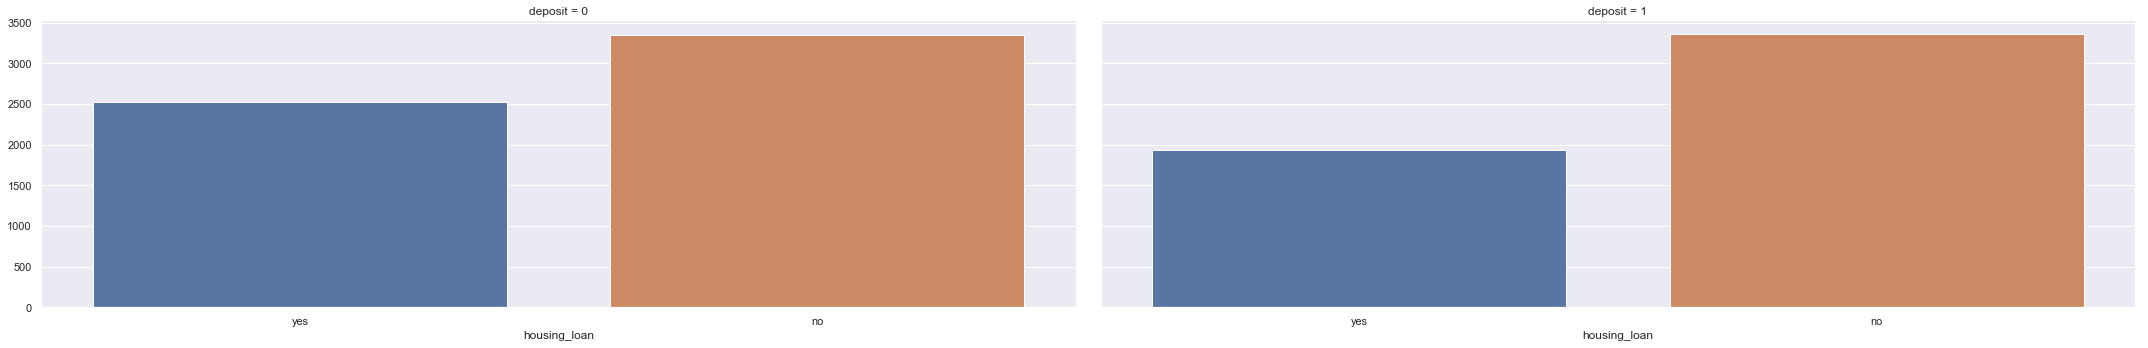

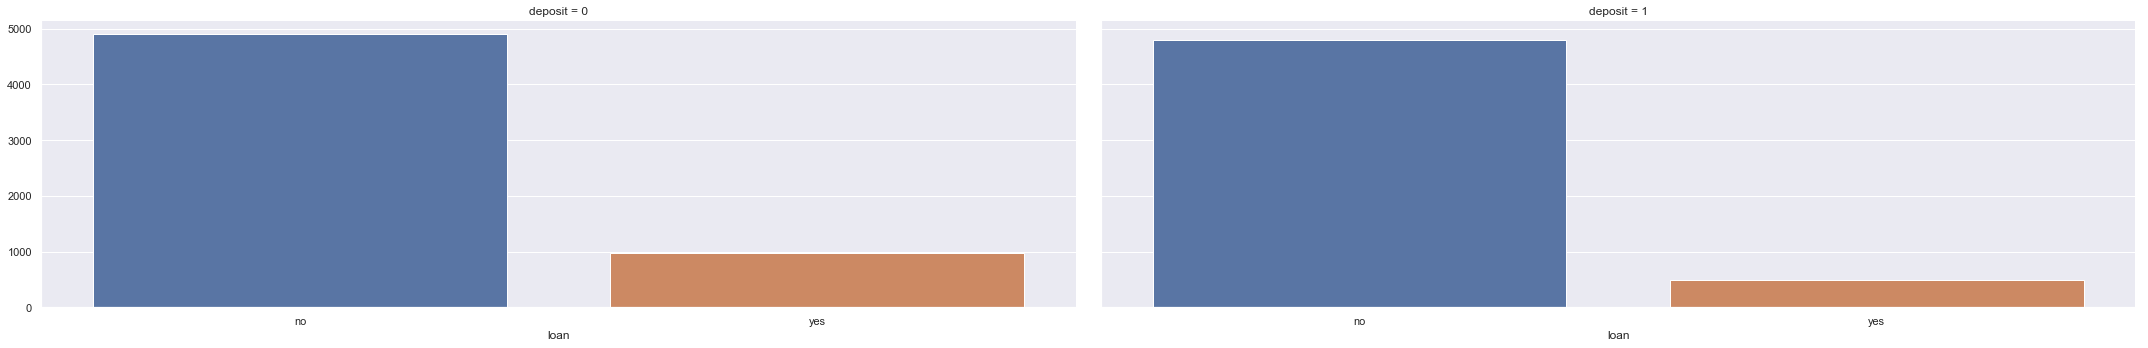

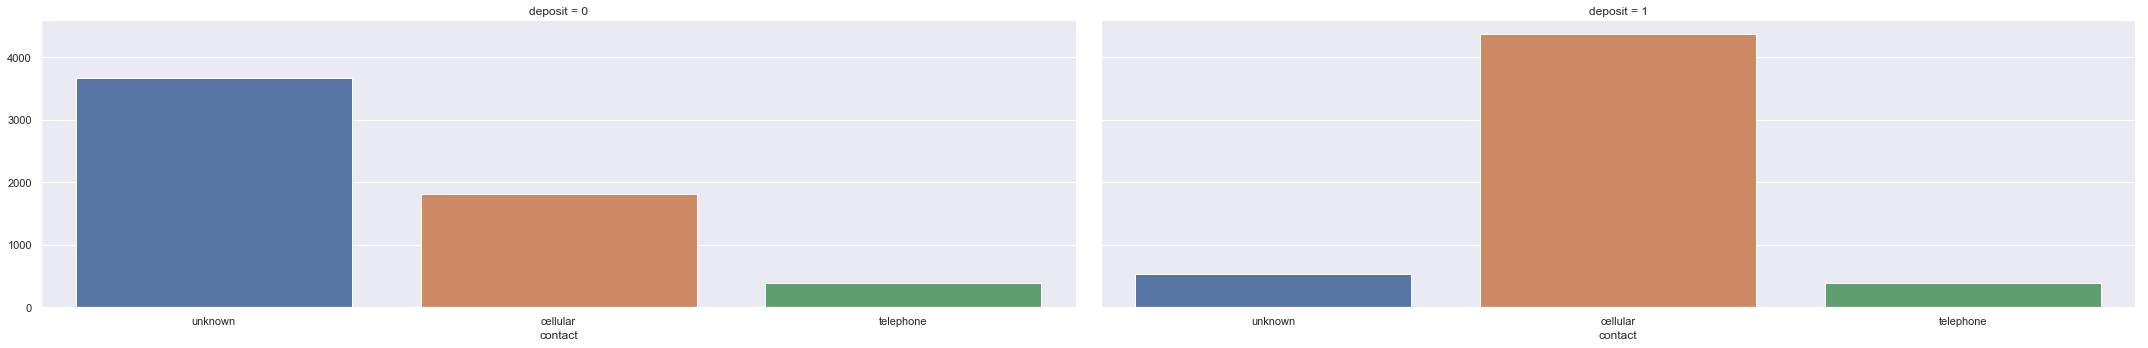

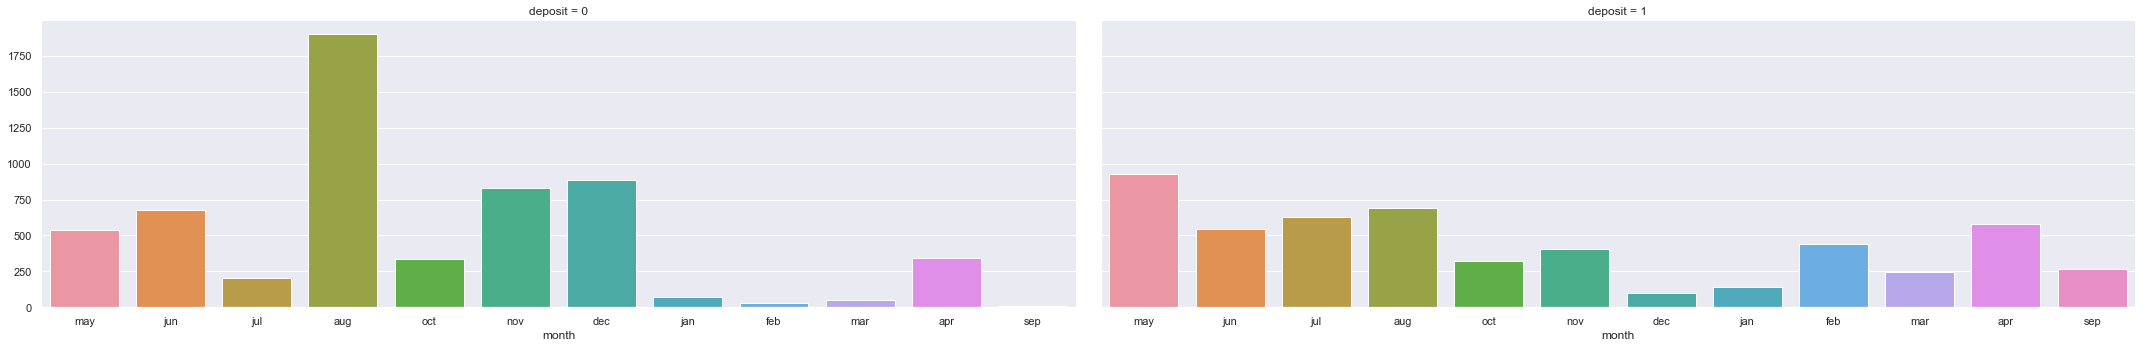

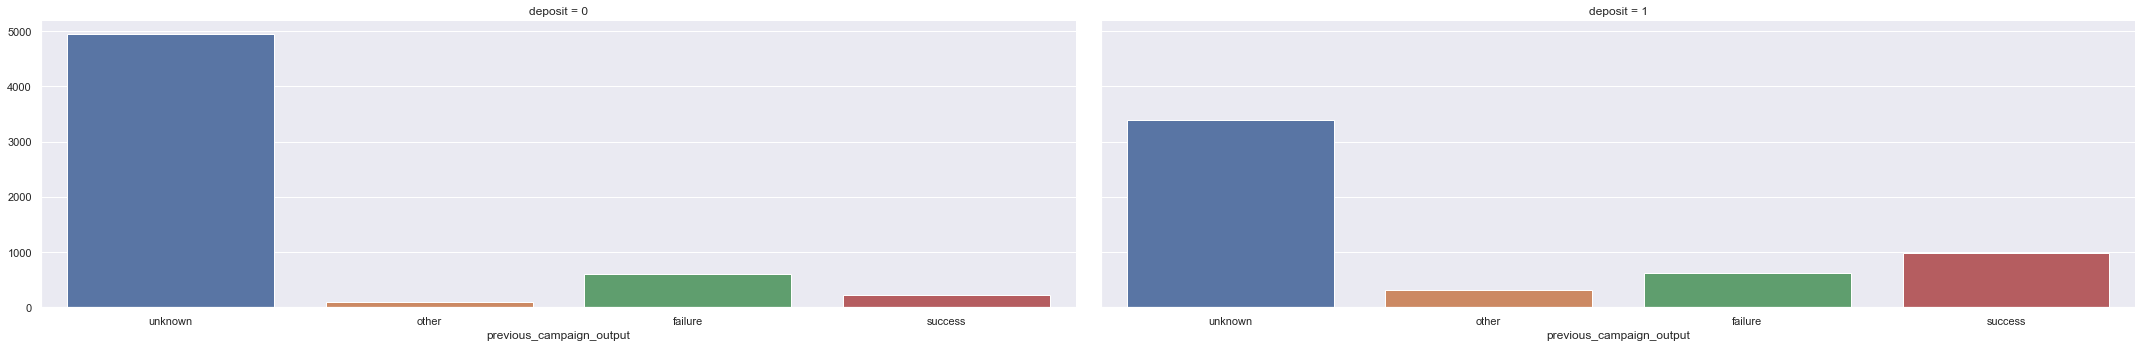

In [17]:
def countplot(x,**kwargs):
    sns.set(style="darkgrid")
    ax = sns.countplot(x=x, data=df)
    
for col in qualitative:
    g = sns.FacetGrid(df, col="deposit", col_wrap = 2, height = 5, aspect = 3)
    g.map(countplot, col)

## Percentage of positive transactions month - wise
***

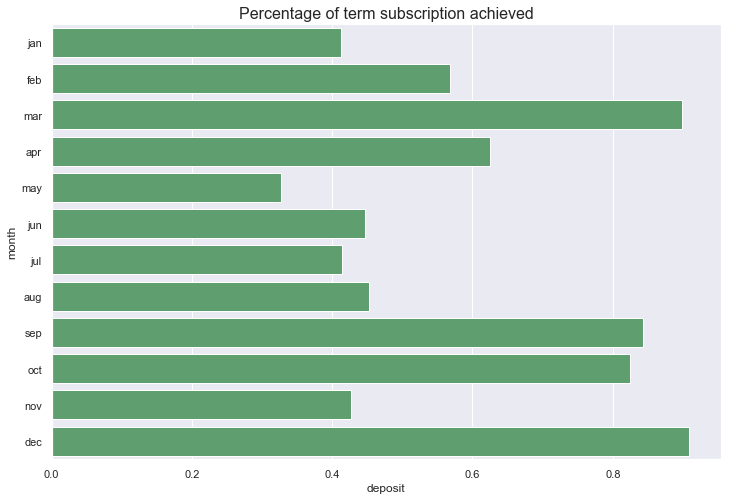

In [18]:
positive_transaction = df[['month', 'deposit']].groupby('month', as_index=False).mean()

fig = plt.figure(figsize=(12,8))

order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
sns.barplot(x="deposit", y="month", data=positive_transaction, order = order,
            label="Percentage of subscription", color="g")

plt.title('Percentage of term subscription achieved', fontsize=16)

plt.show()

## Age versus occupation
***

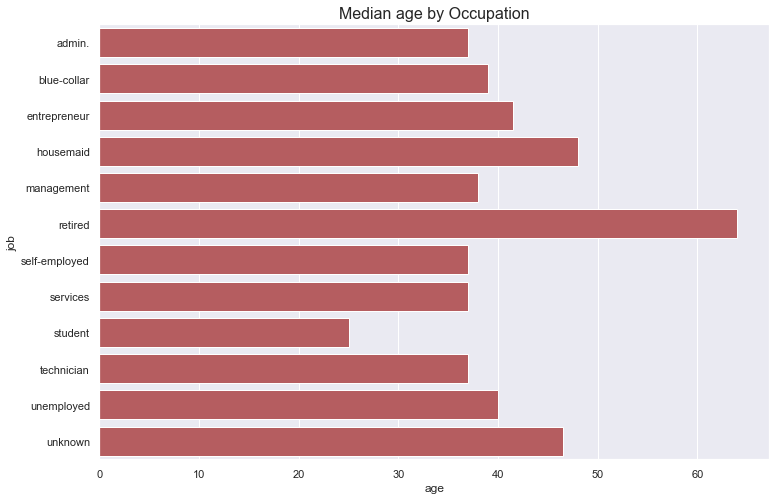

In [19]:
age_median = df.groupby(['job'], as_index=False)['age'].median()

fig = plt.figure(figsize=(12,8))

sns.barplot(x="age", y="job", data=age_median,
            label="Age", color="r")

plt.title('Median age by Occupation', fontsize=16)

plt.show()

## Age groups versus Term deposit subscription probability
***

In [20]:
# Binning age in 5 age groups
age_buckets = pd.cut(df['age'], 5)
age_buckets.value_counts()

(33.4, 48.8]      4812
(17.923, 33.4]    3444
(48.8, 64.2]      2481
(64.2, 79.6]       353
(79.6, 95.0]        72
Name: age, dtype: int64

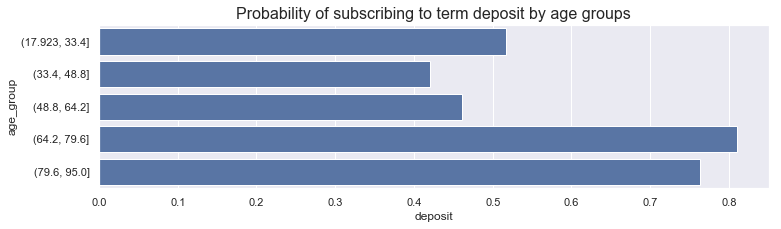

In [21]:
df['age_group'] = age_buckets

deposit_prob = df.groupby(['age_group'], as_index=False)['deposit'].mean()

fig = plt.figure(figsize=(12,3))

sns.barplot(x="deposit", y="age_group", data=deposit_prob,
            label="Probability of subscribing to term deposit", color="b")

plt.title('Probability of subscribing to term deposit by age groups', fontsize=16)
plt.show()

**Observations:**
1. Age group of 17 - 33 (probably students) have 51% chances of subscribing to term deposit.
2. Age groups above 60 (probably retired citizens) have 81% chances of subscribing to term deposit.

## Multivariate Analysis
***

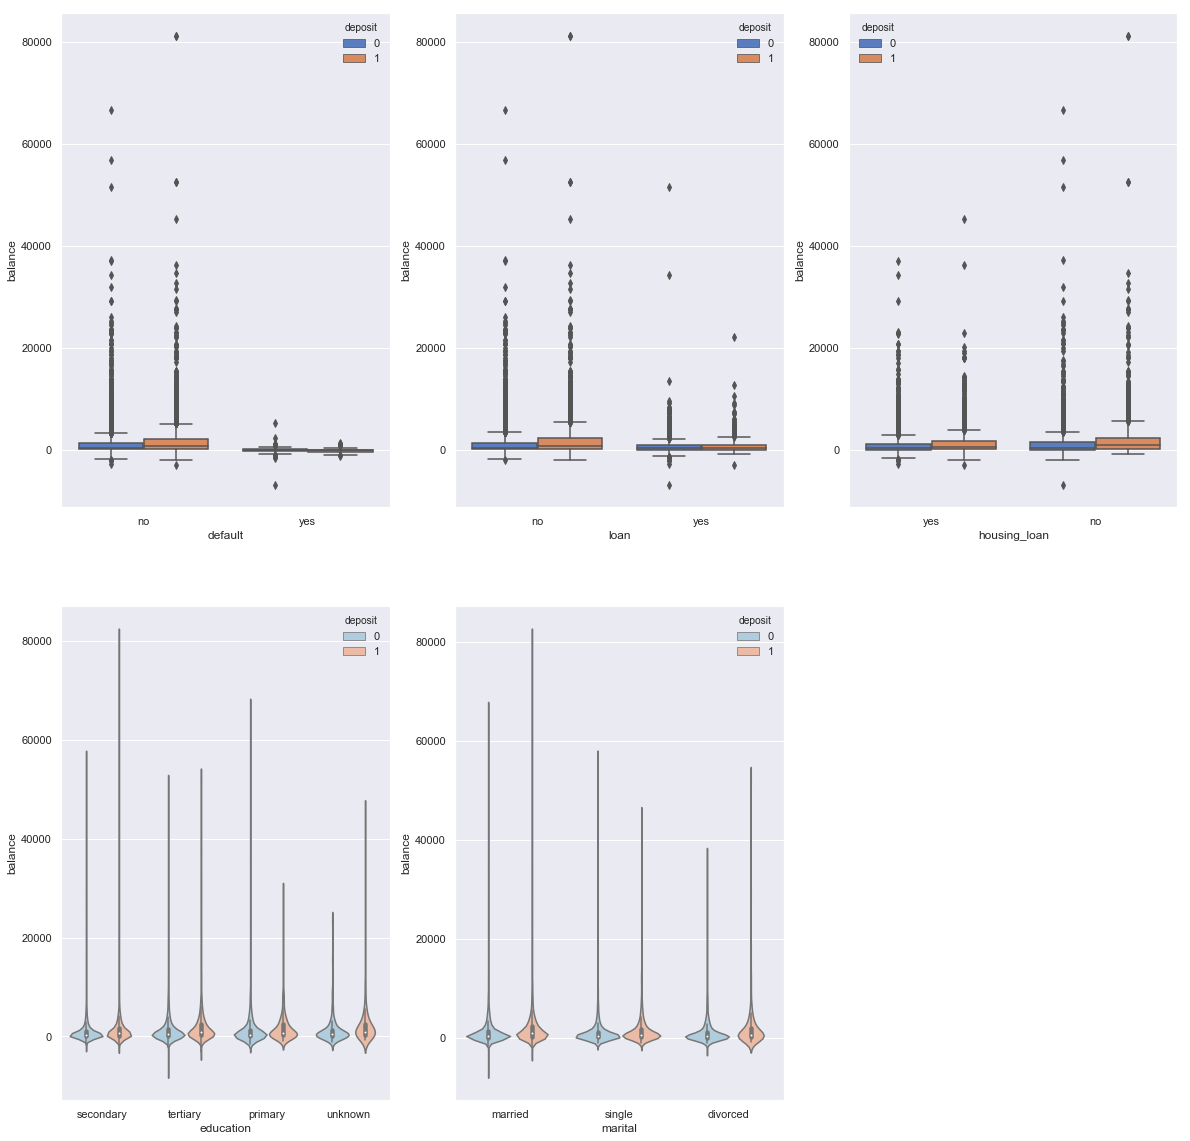

In [22]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)

g1 = sns.boxplot(x="default", y="balance", hue="deposit",
                    data=df, palette="muted", ax=ax1)

g2 = sns.boxplot(x="loan", y="balance", hue="deposit",
                    data=df, palette="muted", ax=ax2)

g3 = sns.boxplot(x="housing_loan", y="balance", hue="deposit",
                    data=df, palette="muted", ax=ax3)


g4 = sns.violinplot(data=df, x="education", y="balance", hue="deposit", 
                    palette="RdBu_r", ax = ax4)

g5 = sns.violinplot(data=df, x="marital", y="balance", hue="deposit", 
                    palette="RdBu_r", ax = ax5)

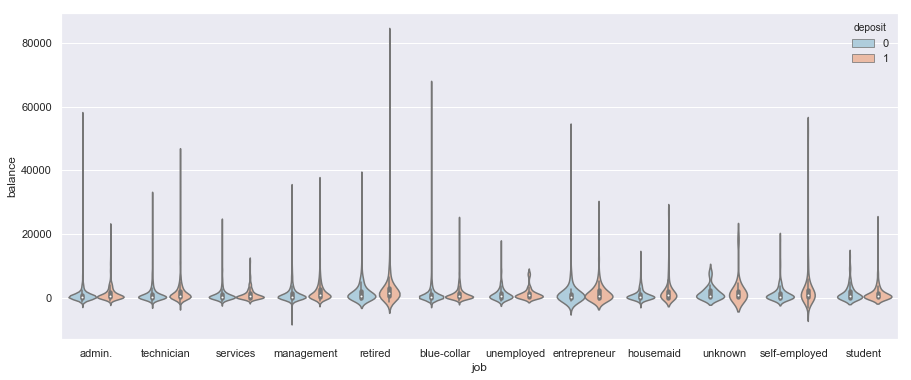

In [23]:
fig, ax = plt.subplots(figsize=(15, 6))

sns.violinplot(data=df, x="job", y="balance", hue="deposit", palette="RdBu_r", ax = ax)

plt.show()

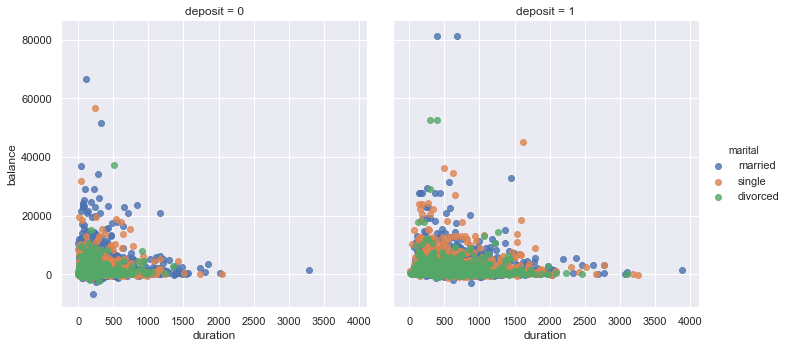

In [24]:
sns.lmplot(x='duration', y='balance', data=df,
           fit_reg=False, # No regression line
           hue='marital', col = 'deposit')
plt.show()

**Observations:**
1. The balance value seems to be lower for single and divorced customers, when compared to married customers.
2. The call duration of last call are higher for the cutomers who subscribed to term deposit.
3. Surprisingly, there are few customers with high balance, who didn't subscribe to term deposit.

In [25]:
# drop rows with education set as 'unknown'
df = df.drop(df.loc[df["education"] == "unknown"].index)

## Education/Marital versus Balance
***

In [26]:
# Concatenating "marital" and "education"
df['marital/education'] = df['marital'] + '/' + df['education']

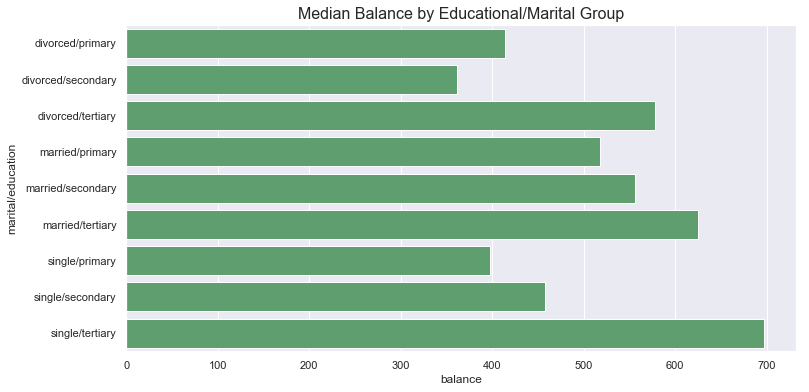

In [27]:
education_groups = df.groupby(['marital/education'], as_index=False)['balance'].median()

fig = plt.figure(figsize=(12,6))

sns.barplot(x="balance", y="marital/education", data=education_groups,
            label="Total", color = 'g')

plt.title('Median Balance by Educational/Marital Group', fontsize=16)

plt.show()

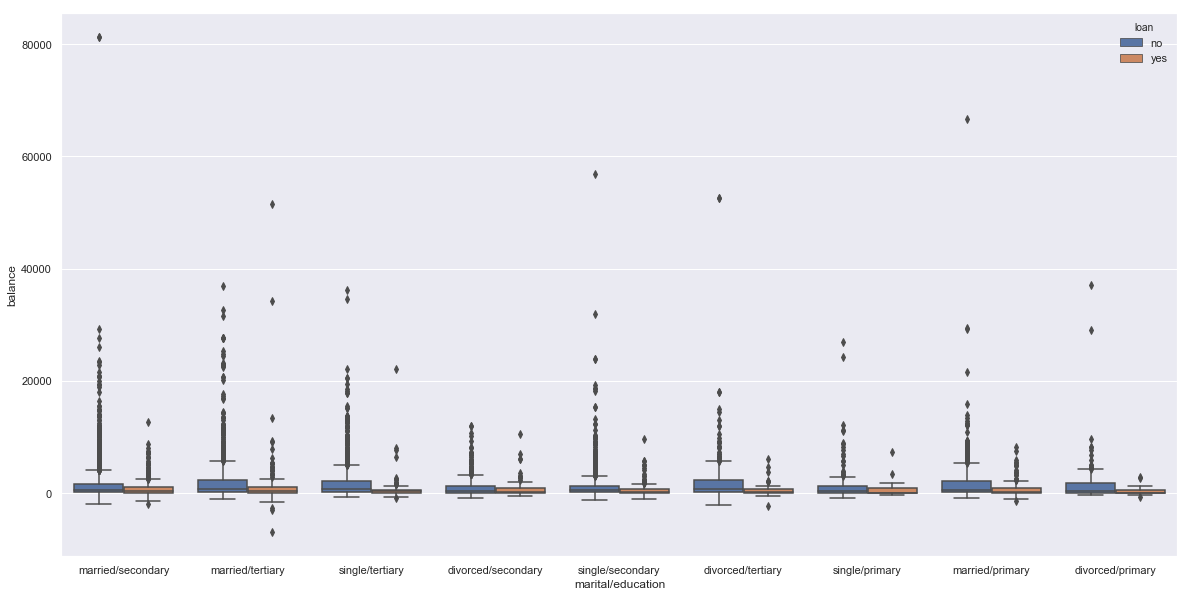

In [28]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x = 'marital/education', y = 'balance', hue = 'loan', data = df, ax = ax)
plt.show()

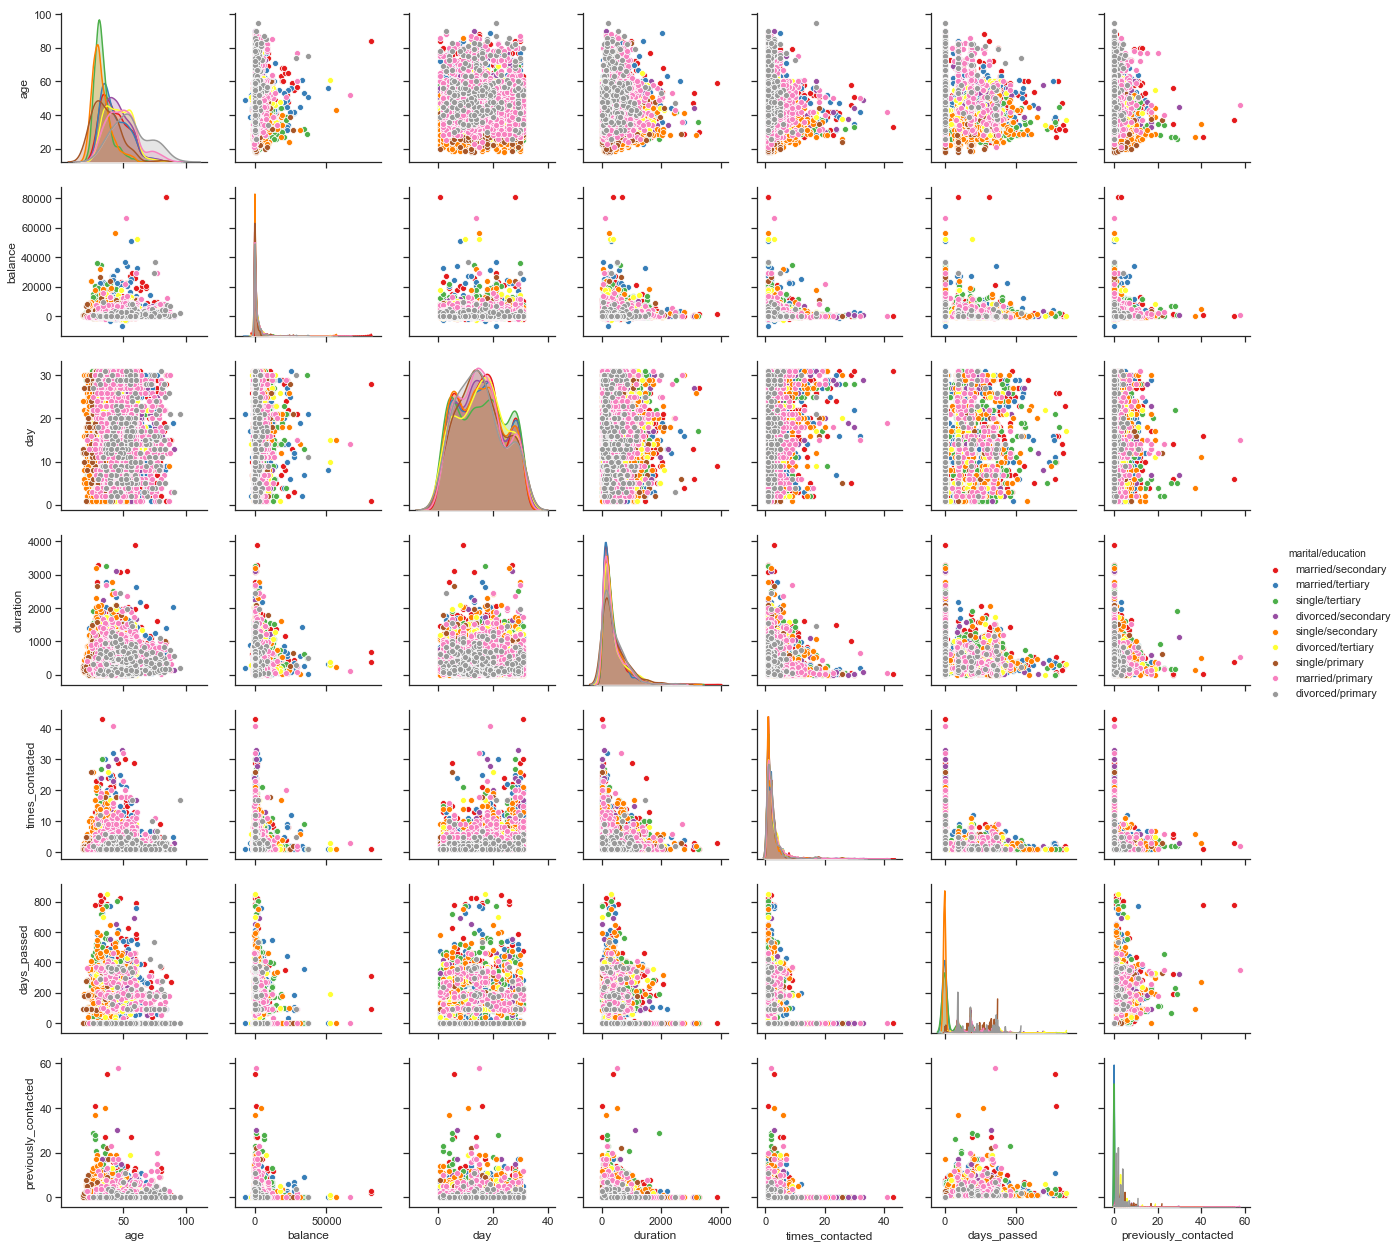

In [29]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df.drop('deposit', axis = 1), hue="marital/education", palette="Set1")
plt.show()

# Preprocessing
***

## Train Test Split
***

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit
# Here we split the data into training and test sets and implement a stratified shuffle split.
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_set, test_set in stratified.split(data, data["loan"]):
    train = data.loc[train_set]
    test = data.loc[test_set]

## Encoding
***

In [31]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

## Selector
***

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

## Scaling and Pipelining
***

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Making pipelines
numerical_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(["age", "balance", "day", "campaign", "pdays", "previous","duration"])),
    ("std_scaler", StandardScaler()),
])

categorical_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(["job", "education", "marital", "default", "housing", "loan", "contact", "month",
                                     "poutcome"])),
    ("cat_encoder", CategoricalEncoder(encoding='onehot-dense'))
])

from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("numerical_pipeline", numerical_pipeline),
        ("categorical_pipeline", categorical_pipeline),
    ])

In [34]:
X_train = preprocess_pipeline.fit_transform(train)
X_test = preprocess_pipeline.fit_transform(test)

In [35]:
y_train = train['deposit']
y_test = test['deposit']

In [36]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
y_train = encode.fit_transform(y_train)
y_test = encode.fit_transform(y_test)

# Modelling
***

In [37]:
import time


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
}

In [38]:
no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.clock()
        classifier.fit(X_train, Y_train)
        t_end = time.clock()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [39]:
df_results = batch_classify(X_train, y_train)

trained Logistic Regression in 0.08 s
trained Nearest Neighbors in 0.22 s
trained Linear SVM in 4.48 s
trained Gradient Boosting Classifier in 2.26 s
trained Decision Tree in 0.09 s
trained Random Forest in 0.25 s
trained Neural Net in 11.10 s
trained Naive Bayes in 0.02 s


In [40]:
print(df_results.sort_values(by='train_score', ascending=False))

                     classifier  train_score  training_time
4                 Decision Tree     1.000000       0.090316
5                 Random Forest     0.998096       0.247297
1             Nearest Neighbors     0.863255       0.220599
3  Gradient Boosting Classifier     0.861463       2.264336
6                    Neural Net     0.853287      11.101745
2                    Linear SVM     0.852391       4.482587
0           Logistic Regression     0.830776       0.083338
7                   Naive Bayes     0.721693       0.022746


## Cross - Validation Scores
***

In [42]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=3)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = neural_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

In [43]:
# All our models perform well but I will go with GradientBoosting.
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
6,Neural Classifier,0.846905
7,Naives Bayes,0.846905
4,Grad B CLF,0.845224
5,Rand FC,0.840856
1,SVC,0.840186
0,Logistic Reg.,0.828425
2,KNN,0.804458
3,Dec Tree,0.784074


### Accuracy Score
***

In [44]:
from sklearn.metrics import accuracy_score
grad_clf.fit(X_train, y_train)

y_test_pred = grad_clf.predict(X_test)
print ("Gradient Boost Classifier accuracy is %2.2f" % accuracy_score(y_test, y_test_pred))

Gradient Boost Classifier accuracy is 0.83


### Confusion Matrix
***

In [45]:
from sklearn.metrics import confusion_matrix
# 1176: no's, 1057: yes
confusion_matrix(y_test, y_test_pred)

array([[971, 205],
       [164, 893]])

### Precision and Recall
***

In [46]:
from sklearn.metrics import precision_score, recall_score

print('Precision Score: ', precision_score(y_test, y_test_pred))
# The classifier only detects 60% of potential clients that will suscribe to a term deposit.
print('Recall Score: ', recall_score(y_test, y_test_pred))

Precision Score:  0.8132969034608379
Recall Score:  0.8448438978240302


### F1 score
***

In [47]:
from sklearn.metrics import f1_score

f1_score(y_test, y_test_pred)

0.82877030162413

### Cross Val Predict
***

In [49]:
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(grad_clf, X_train, y_train, cv=3, method="decision_function")
neural_y_scores = cross_val_predict(neural_clf, X_train, y_train, cv=3, method="predict_proba")
naives_y_scores = cross_val_predict(nav_clf, X_train, y_train, cv=3, method="predict_proba")

In [50]:
# hack to work around issue #9589 introduced in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

if neural_y_scores.ndim == 2:
    neural_y_scores = neural_y_scores[:, 1]
    
if naives_y_scores.ndim == 2:
    naives_y_scores = naives_y_scores[:, 1]

In [51]:
# How can we decide which threshold to use? We want to return the scores instead of predictions with this code.
from sklearn.metrics import precision_recall_curve

precisions, recalls, threshold = precision_recall_curve(y_train, y_scores)

### Precision and Recall Tradeoff to find right threshold
***

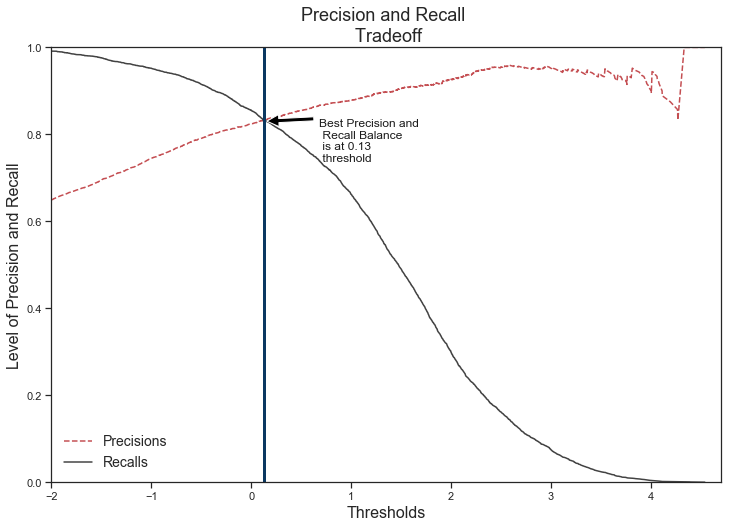

In [52]:
def precision_recall_curve(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(thresholds, precisions[:-1], "r--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "#424242", label="Recalls")
    plt.title("Precision and Recall \n Tradeoff", fontsize=18)
    plt.ylabel("Level of Precision and Recall", fontsize=16)
    plt.xlabel("Thresholds", fontsize=16)
    plt.legend(loc="best", fontsize=14)
    plt.xlim([-2, 4.7])
    plt.ylim([0, 1])
    plt.axvline(x=0.13, linewidth=3, color="#0B3861")
    plt.annotate('Best Precision and \n Recall Balance \n is at 0.13 \n threshold ', xy=(0.13, 0.83), xytext=(55, -40),
             textcoords="offset points",
            arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=12, 
                color='k')
    
precision_recall_curve(precisions, recalls, threshold)
plt.show()

### ROC Curve
***

In [53]:
from sklearn.metrics import roc_curve
# Gradient Boosting Classifier
# Neural Classifier
# Naives Bayes Classifier
grd_fpr, grd_tpr, thresold = roc_curve(y_train, y_scores)
neu_fpr, neu_tpr, neu_threshold = roc_curve(y_train, neural_y_scores)
nav_fpr, nav_tpr, nav_threshold = roc_curve(y_train, naives_y_scores)

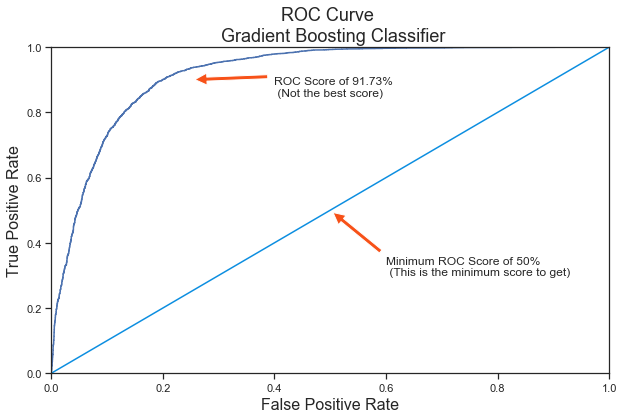

In [54]:
def graph_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.figure(figsize=(10,6))
    plt.title('ROC Curve \n Gradient Boosting Classifier', fontsize=18)
    plt.plot(false_positive_rate, true_positive_rate, label=label)
    plt.plot([0, 1], [0, 1], '#0C8EE0')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('ROC Score of 91.73% \n (Not the best score)', xy=(0.25, 0.9), xytext=(0.4, 0.85),
            arrowprops=dict(facecolor='#F75118', shrink=0.05),
            )
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#F75118', shrink=0.05),
                )
    
    
graph_roc_curve(grd_fpr, grd_tpr, threshold)
plt.show()

In [55]:
from sklearn.metrics import roc_auc_score

print('Gradient Boost Classifier Score: ', roc_auc_score(y_train, y_scores))
print('Neural Classifier Score: ', roc_auc_score(y_train, neural_y_scores))
print('Naives Bayes Classifier: ', roc_auc_score(y_train, naives_y_scores))

Gradient Boost Classifier Score:  0.9173141676724835
Neural Classifier Score:  0.9162435460352966
Naives Bayes Classifier:  0.803363959942255


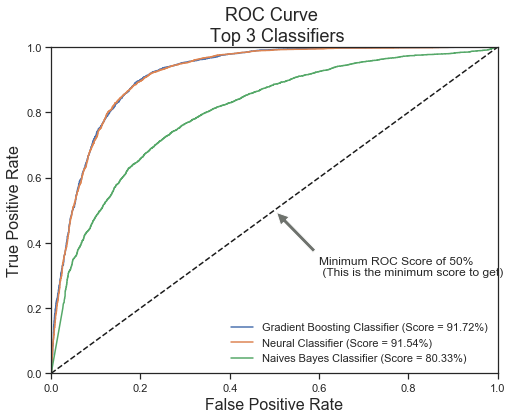

In [56]:
def graph_roc_curve_multiple(grd_fpr, grd_tpr, neu_fpr, neu_tpr, nav_fpr, nav_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(grd_fpr, grd_tpr, label='Gradient Boosting Classifier (Score = 91.72%)')
    plt.plot(neu_fpr, neu_tpr, label='Neural Classifier (Score = 91.54%)')
    plt.plot(nav_fpr, nav_tpr, label='Naives Bayes Classifier (Score = 80.33%)')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(grd_fpr, grd_tpr, neu_fpr, neu_tpr, nav_fpr, nav_tpr)
plt.show()


# Feature Importance
***

## Decision Tree Classifier
***

Feature ranking:
1. feature 11 (0.591310)
2. feature 8 (0.129966)
3. feature 6 (0.067020)
4. feature 13 (0.049923)
5. feature 15 (0.038138)
6. feature 14 (0.037830)
7. feature 10 (0.026646)
8. feature 5 (0.025842)
9. feature 0 (0.017757)
10. feature 12 (0.007889)
11. feature 3 (0.005280)
12. feature 9 (0.002200)
13. feature 2 (0.000147)
14. feature 1 (0.000050)
15. feature 7 (0.000000)
16. feature 4 (0.000000)


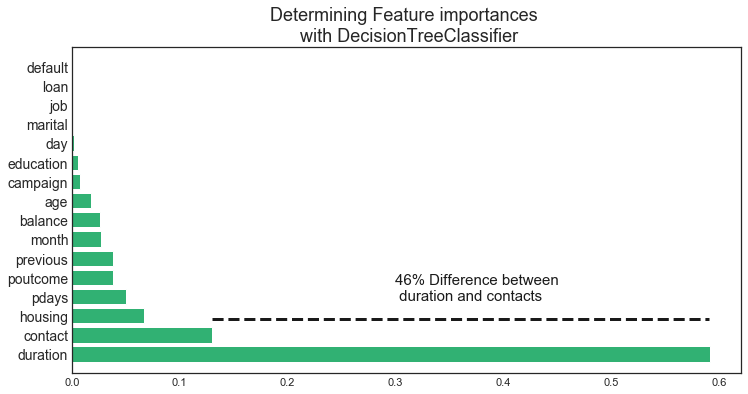

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
plt.style.use('seaborn-white')

# Convert the columns into categorical variables
data['job'] = data['job'].astype('category').cat.codes
data['marital'] = data['marital'].astype('category').cat.codes
data['education'] = data['education'].astype('category').cat.codes
data['contact'] = data['contact'].astype('category').cat.codes
data['poutcome'] = data['poutcome'].astype('category').cat.codes
data['month'] = data['month'].astype('category').cat.codes
data['default'] = data['default'].astype('category').cat.codes
data['loan'] = data['loan'].astype('category').cat.codes
data['housing'] = data['housing'].astype('category').cat.codes

# Let's create new splittings like before but now we modified the data so we need to do it one more time.
# Create train and test splits
target_name = 'deposit'
X = data.drop('deposit', axis=1)


label=data[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,label,test_size=0.2, random_state=42, stratify=label)

# Build a classification task using 3 informative features
tree = tree.DecisionTreeClassifier(
    class_weight='balanced',
    min_weight_fraction_leaf = 0.01
    )

tree = tree.fit(X_train, y_train)
importances = tree.feature_importances_
feature_names = data.drop('deposit', axis=1).columns
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    plt.title("Determining Feature importances \n with DecisionTreeClassifier", fontsize=18)
    plt.barh(range(len(indices)), importances[indices], color='#31B173',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    plt.axhline(y=1.85, xmin=0.21, xmax=0.952, color='k', linewidth=3, linestyle='--')
    plt.text(0.30, 2.8, '46% Difference between \n duration and contacts', color='k', fontsize=15)
    
feature_importance_graph(indices, importances, feature_names)
plt.show()

# Prescriptive Analytics
***
<img src = '../images/prescriptive_analytics.png'/>
### Following are the key takeaways that would be immensely beneficial for any further market campaigning of Term Deposit:
- Call duration is the defining factor for client's subscription. A proper questionnaire should be developed to make effective use of the call time.
- It is seen that the likelihood of client subscribing after 3 calls is as low as 34%. So, the client should not be bothered any more after 3 calls.
- The balance of the individual decreases on divorce. The reason is supposedly the split up of properties after divorce.
- The age group of 17 - 31 (that represents students), and the age group above 60 (which represents retired citizens), are more likely (which is 51% and 81%) to subscribe. The focus should be on targeting them for the next campaign.
- It is observed that clients who are defaulter, or has a personal/housing loan going on, are less likely to subscribe to term deposits. The campaign should not target clients belonging to such categories.
- It is observed that highest number of clients has been reached out at months May, June, July and August. Yet the conversion rate has been as low as 32%, 44%, 41%, 45%. Whereas the months September, October, December and March showed highest percentage of conversions - 84%, 82%, 90% and 89%. Clearly, the clients should be targeted more during the months September, October, December and March.